In [8]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np


In [9]:
data=pd.read_csv("C:/Users/ASUS/Desktop/MetehanHocaDDO/yeast.csv")

<Axes: >

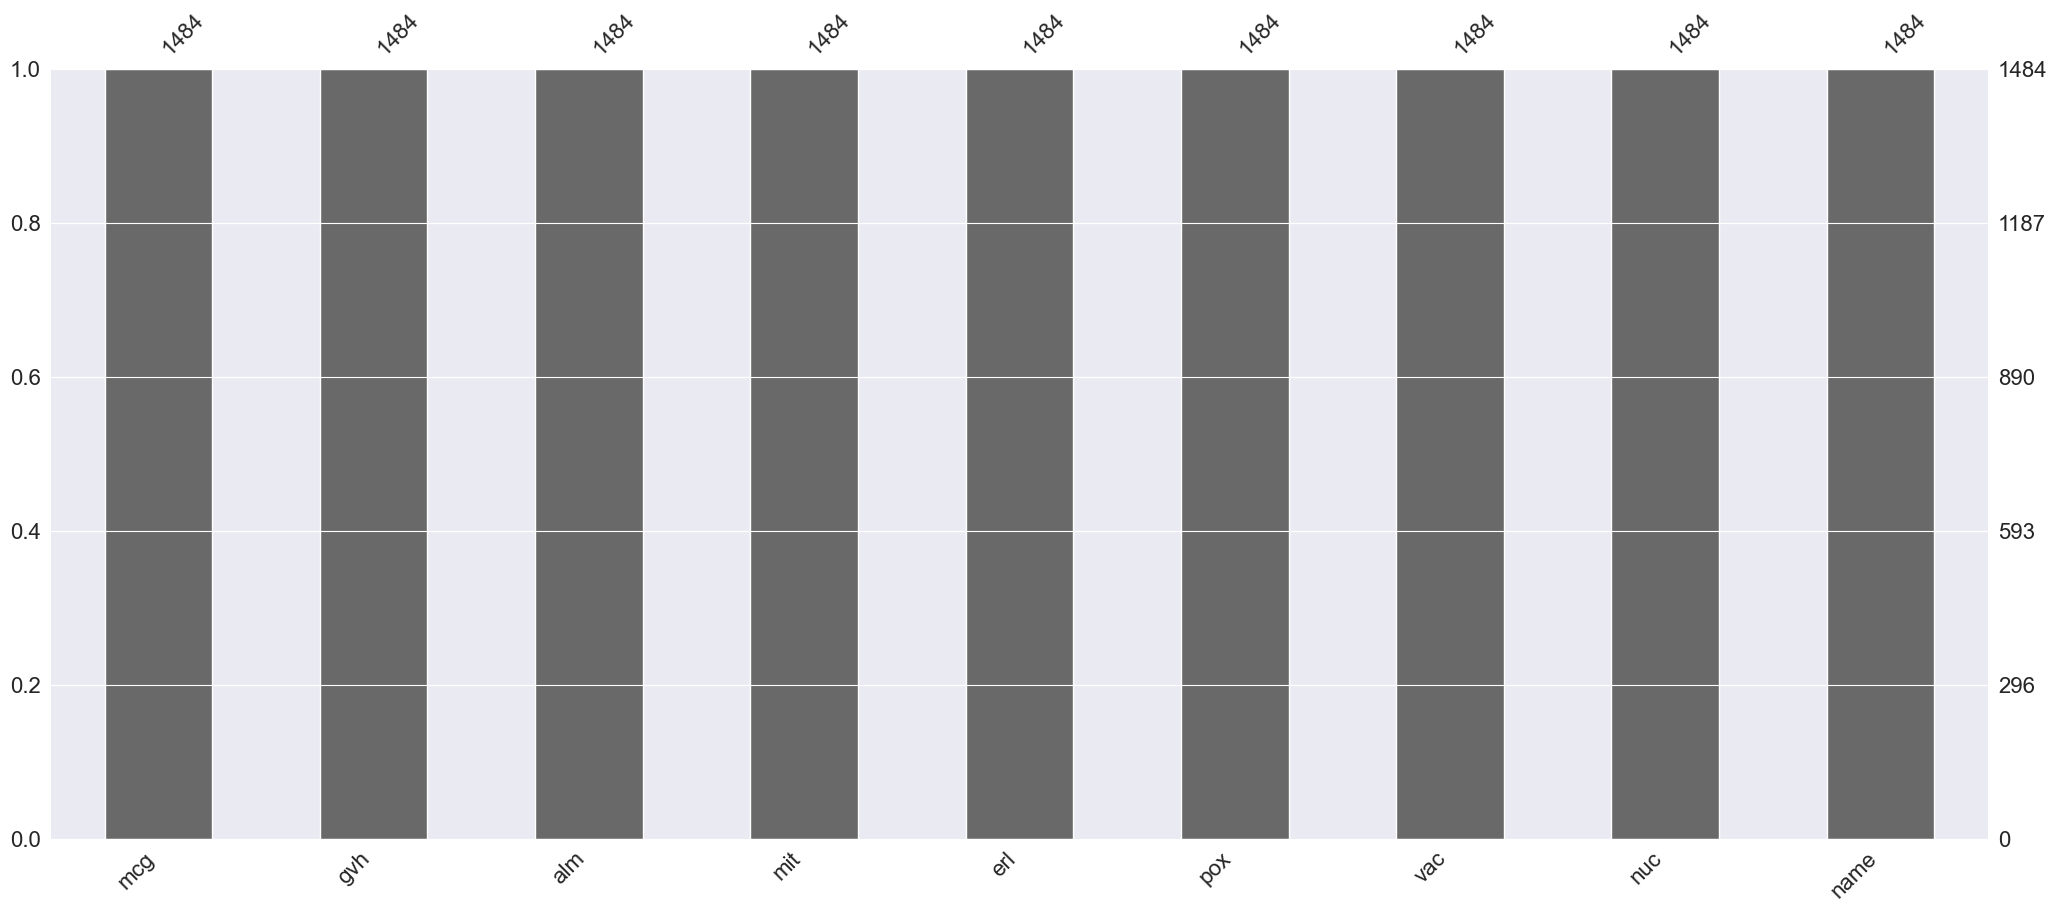

In [10]:
import missingno as msno
msno.bar(data)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     1484 non-null   float64
 1   gvh     1484 non-null   float64
 2   alm     1484 non-null   float64
 3   mit     1484 non-null   float64
 4   erl     1484 non-null   float64
 5   pox     1484 non-null   float64
 6   vac     1484 non-null   float64
 7   nuc     1484 non-null   float64
 8   name    1484 non-null   object 
dtypes: float64(8), object(1)
memory usage: 104.5+ KB


In [12]:
data.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [13]:
from sklearn.preprocessing import LabelEncoder


In [14]:
data["name"].unique()

array(['MIT', 'NUC', 'CYT', 'ME1', 'EXC', 'ME2', 'ME3', 'VAC', 'POX',
       'ERL'], dtype=object)

In [15]:
labEnc=LabelEncoder()
labEnc.fit(['MIT', 'NUC', 'CYT', 'ME1', 'EXC', 'ME2', 'ME3', 'VAC', 'POX','ERL'])
data["name"]=labEnc.transform(data["name"])
data.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,6
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,6
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,6
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,7
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,6


In [16]:
y=data["name"]
X=data.drop("name",axis=1)

In [17]:
y.value_counts()

name
0    463
7    429
6    244
5    163
4     51
3     44
2     35
9     30
8     20
1      5
Name: count, dtype: int64

In [18]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X, y = sm.fit_resample(X, y)

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 5, n_samples = 5

In [ ]:
y.value_counts()

In [ ]:
from sklearn.model_selection import KFold,train_test_split,GridSearchCV

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=0)

In [ ]:
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
kfold=KFold(n_splits=5)
model=GridSearchCV(DecisionTreeClassifier(),refit = True, verbose=2,cv=kfold,param_grid=param_grid,scoring='accuracy').fit(X_train,y_train)
pred=model.predict(X_test)




In [ ]:
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score,confusion_matrix


In [ ]:
confusion_matrix(y_test,pred)

In [ ]:
accuracy_score(y_test,pred)

In [ ]:
recall_score(y_test,pred,average='weighted')
